In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import joblib

In [2]:
dataset = pd.read_csv("phishcoop.csv")
dataset = dataset.drop('id', 1)

In [3]:
dataset.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            1
Abnormal_URL                   1
Redirect                       1
on_mouseover                   1
RightClick                     1
popUpWidnow                    1
Iframe                         1
age_of_domain                  1
DNSRecord                      1
web_traffic                    1
Page_Rank                      1
Google_Index                   1
Links_pointing_to_page         1
Statistical_report             1
Result    

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6993 entries, 0 to 6992
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_IP_Address            6993 non-null   int64  
 1   URL_Length                   6993 non-null   int64  
 2   Shortining_Service           6993 non-null   int64  
 3   having_At_Symbol             6993 non-null   int64  
 4   double_slash_redirecting     6993 non-null   int64  
 5   Prefix_Suffix                6993 non-null   int64  
 6   having_Sub_Domain            6993 non-null   int64  
 7   SSLfinal_State               6993 non-null   int64  
 8   Domain_registeration_length  6993 non-null   int64  
 9   Favicon                      6993 non-null   int64  
 10  port                         6993 non-null   int64  
 11  HTTPS_token                  6993 non-null   int64  
 12  Request_URL                  6993 non-null   int64  
 13  URL_of_Anchor     

In [14]:
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state =0)

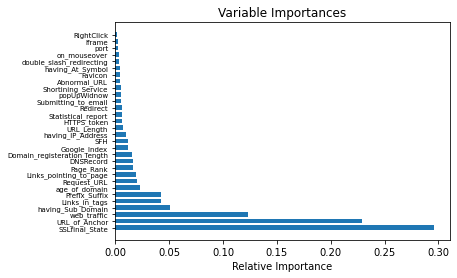

In [24]:
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()

In [26]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

x_test = x_test.fillna(x_train.mean())


#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/home/kshitiz/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


AttributeError: 'numpy.ndarray' object has no attribute 'fillna'